# Wand Binds to ImageMagick

[Wand](https://docs.wand-py.org/) is a `ctypes`-based [📖 [docs](https://docs.python.org/3/library/ctypes.html#module-ctypes)] simple [ImageMagick](http://www.imagemagick.org/) binding for Python.

## Debian/Ubuntu Installation (Anaconda)

Anaconda will install the Python module and ImageMagick:

```bash
conda install -c conda-forge wand
```

To install without Anaconda, see “[Install ImageMagick on Debian/Ubuntu](https://docs.wand-py.org/en/0.6.2/guide/install.html#install-imagemagick-on-debian-ubuntu).”


## Construct an Image from Disk

The `Image` constructor has a `filename` argument which is used to read a file from disk:


In [40]:
from wand.image import Image

image_from_disk = Image(filename='./wand-00.png')

print('width:', image_from_disk.width)
print('height:', image_from_disk.height)

width: 800
height: 800


Note the `filename` and `file` arguments of `Image`:

In [41]:
help(Image.__init__)

Help on function __init__ in module wand.image:

__init__(self, image=None, blob=None, file=None, filename=None, format=None, width=None, height=None, depth=None, background=None, resolution=None, pseudo=None, colorspace=None, units=None)
    Initialize self.  See help(type(self)) for accurate signature.



From [the documentation](https://docs.wand-py.org/en/0.6.2/guide/read.html#open-an-image-file):

>There is a keyword argument named `file` as well, but don’t confuse it with `filename`. While `filename` takes a string of a \[file name\], `file` takes \[an\] input stream (file-like object).

## Constructing an Image from a Remote stream

The `requests` [library](https://requests.readthedocs.io/en/master/) gives us a stream (when we construct with `stream=True` [📖 [docs](https://requests.readthedocs.io/en/master/user/quickstart/#raw-response-content)]):

In [42]:
import requests

image_from_stream = None

response = requests.get('https://placekitten.com/200/300', stream=True)

print('status_code:', response.status_code)

status_code: 200


In [43]:
try:
    image_from_stream = Image(file=response.raw)

    print('format =', image_from_stream.format)
    print('size =', image_from_stream.size)
finally:
    response.close()

format = JPEG
size = (200, 300)


## Displaying Images

One ‘default and easy’ way to display an image in Jupyter notebooks is with `%%html` magic:

In [44]:
%%html

<img src="./wand-00.png" />

Actually, markdown should work here as well:

![yup](./wand-00.png)

We can dial down ‘default and easy’ and use `Image` [📖 [docs](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image)] from the `IPython.display` module:

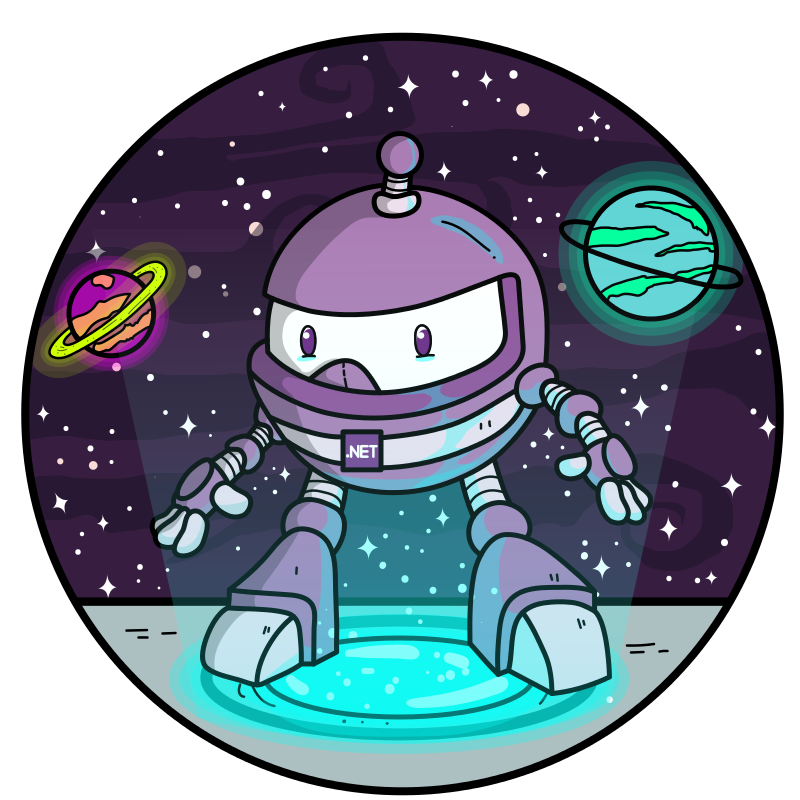

In [45]:
from IPython.display import Image

Image(filename='./wand-00.png')

Alternatively, when we know the image type, we can use `display_png()` [📖 [docs](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display_png)]:

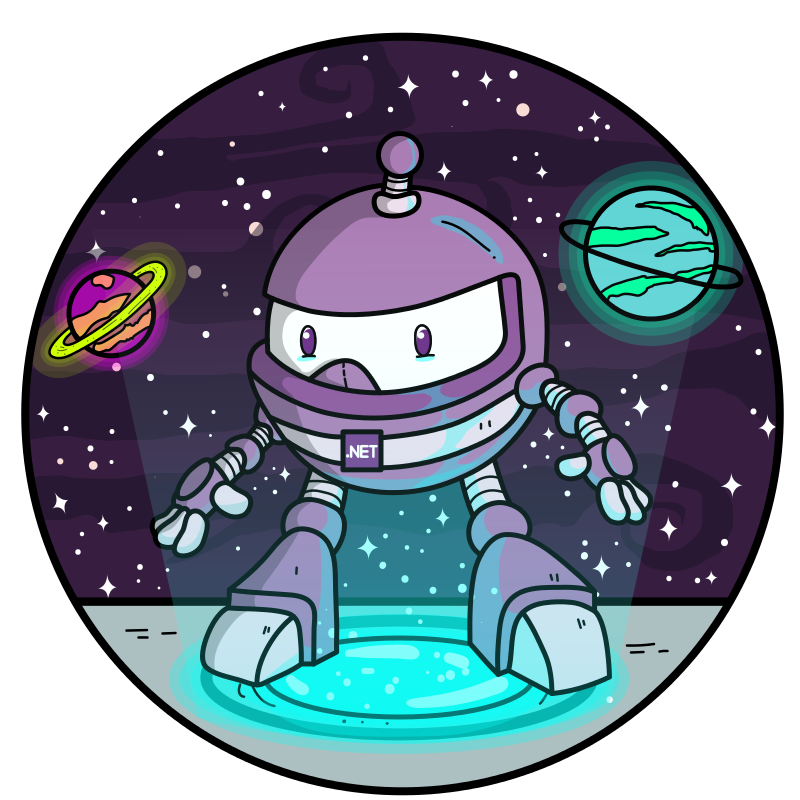

In [46]:
from IPython.display import display_png

display_png(image_from_disk)

## Saving Images

None of the `IPython` magic tricks above support _streams_. For the sake of publication, an image stream will be saved to disk:

In [47]:
image_from_stream.save(filename='wand-00-from-stream.png')

![place kitten](./wand-00-from-stream.png)

## Closing Images Explicitly

Much of the Wand documentation uses `with` [📖 [docs](https://docs.python.org/2.5/whatsnew/pep-343.html)] blocks which implies that `Image.close()` [📖 [docs](https://docs.wand-py.org/en/0.6.3/wand/image.html?highlight=close#wand.image.Image.close)] is being called implicitly. Here we do explicitly:

In [48]:
image_from_disk.close()
image_from_stream.close()